In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

!nvidia-smi

Wed Jun 19 17:02:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:19:00.0 Off |                  Off |
|  0%   54C    P8             27W /  450W |    4549MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler, DPMSolverSDEScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
pipe.scheduler = DPMSolverSDEScheduler.from_config(pipe.scheduler.config)

pipe.load_textual_inversion('/data/sd-results/shark_inversion/shark_inversion.safetensors', token="mychar4")

print('done')

/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-19 18:19:25.140724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 18:19:26.121891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access Untyped

done


/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/diffusers/configuration_utils.py:139: FutureWarning: Accessing config attribute `use_karras_sigmas` directly via 'DPMSolverSDEScheduler' object attribute is deprecated. Please access 'use_karras_sigmas' over 'DPMSolverSDEScheduler's config object instead, e.g. 'scheduler.config.use_karras_sigmas'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


 90%|██████████████████████████████████████▋    | 18/20 [00:08<00:00,  2.40it/s]/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/torchsde/_brownian/brownian_interval.py:599: UserWarning: Should have ta>=t0 but got ta=0.0291675366461277 and t0=0.029168.
  warnings.warn(f"Should have ta>=t0 but got ta={ta} and t0={self._start}.")
100%|███████████████████████████████████████████| 20/20 [00:09<00:00,  2.16it/s]


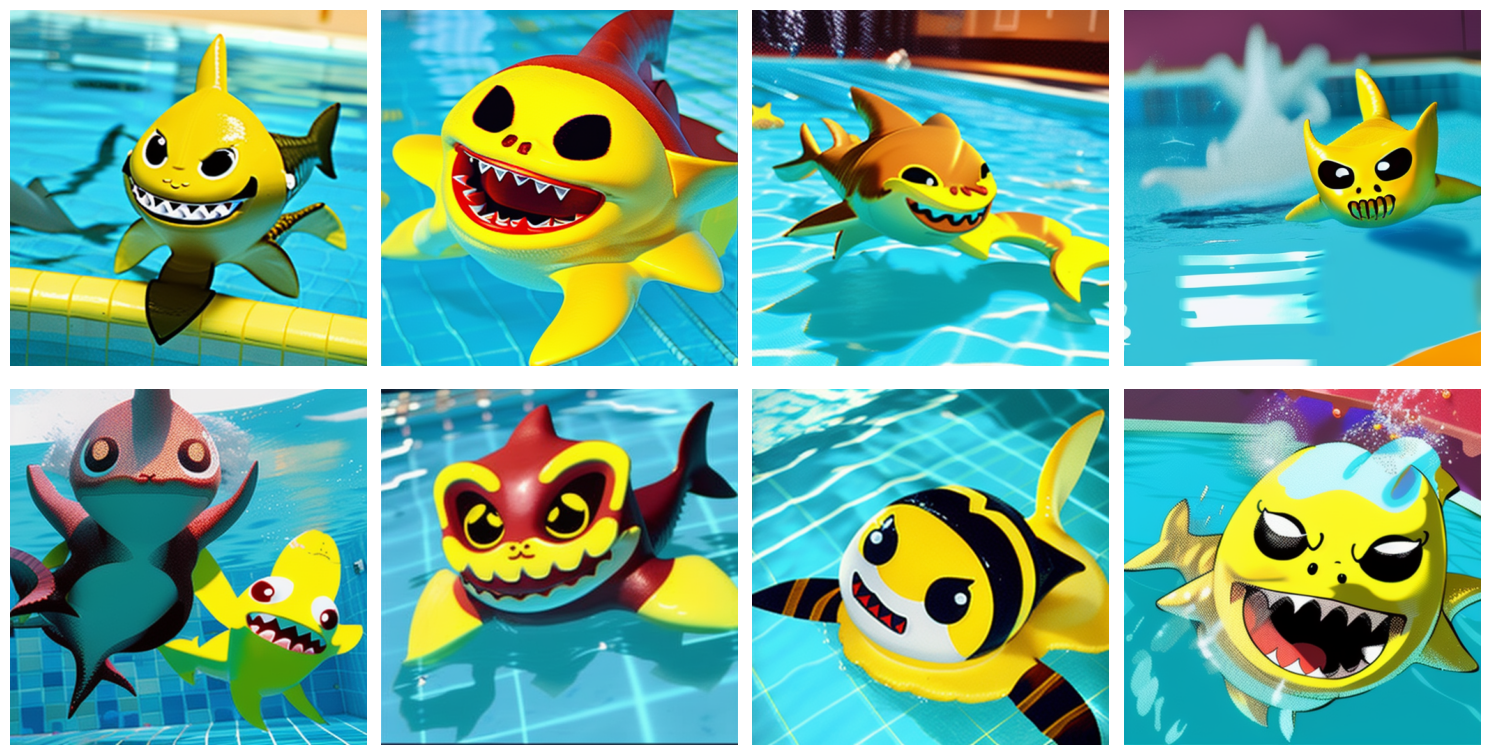

In [3]:
prompt = "mychar4, swimming in the pool"

images = pipe(prompt=prompt,
         height=512,
         width=512,
         num_inference_steps=20,
         guidance_scale=7,
         num_images_per_prompt=8
        ).images


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
